In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
# Load your dataset
df = pd.read_csv('./tvmarketing.csv')
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
df.shape

(200, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: >

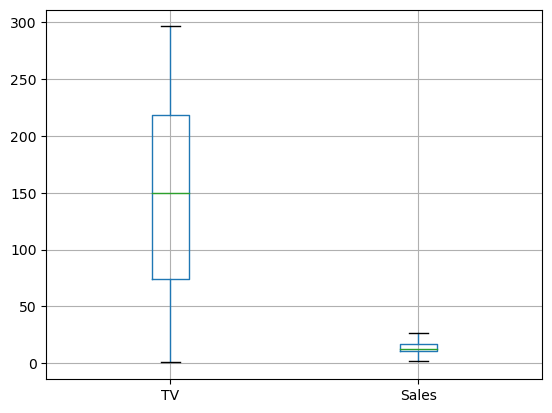

In [6]:
df.boxplot()

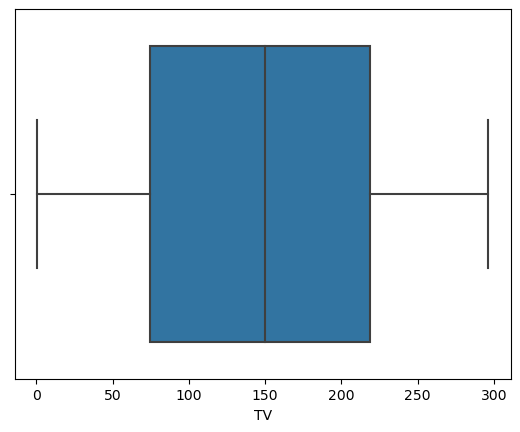

In [7]:
sns.boxplot(x=df['TV'])
plt.show()

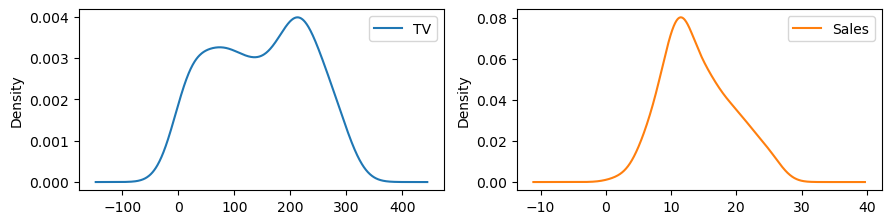

In [8]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(16,8))
plt.show()

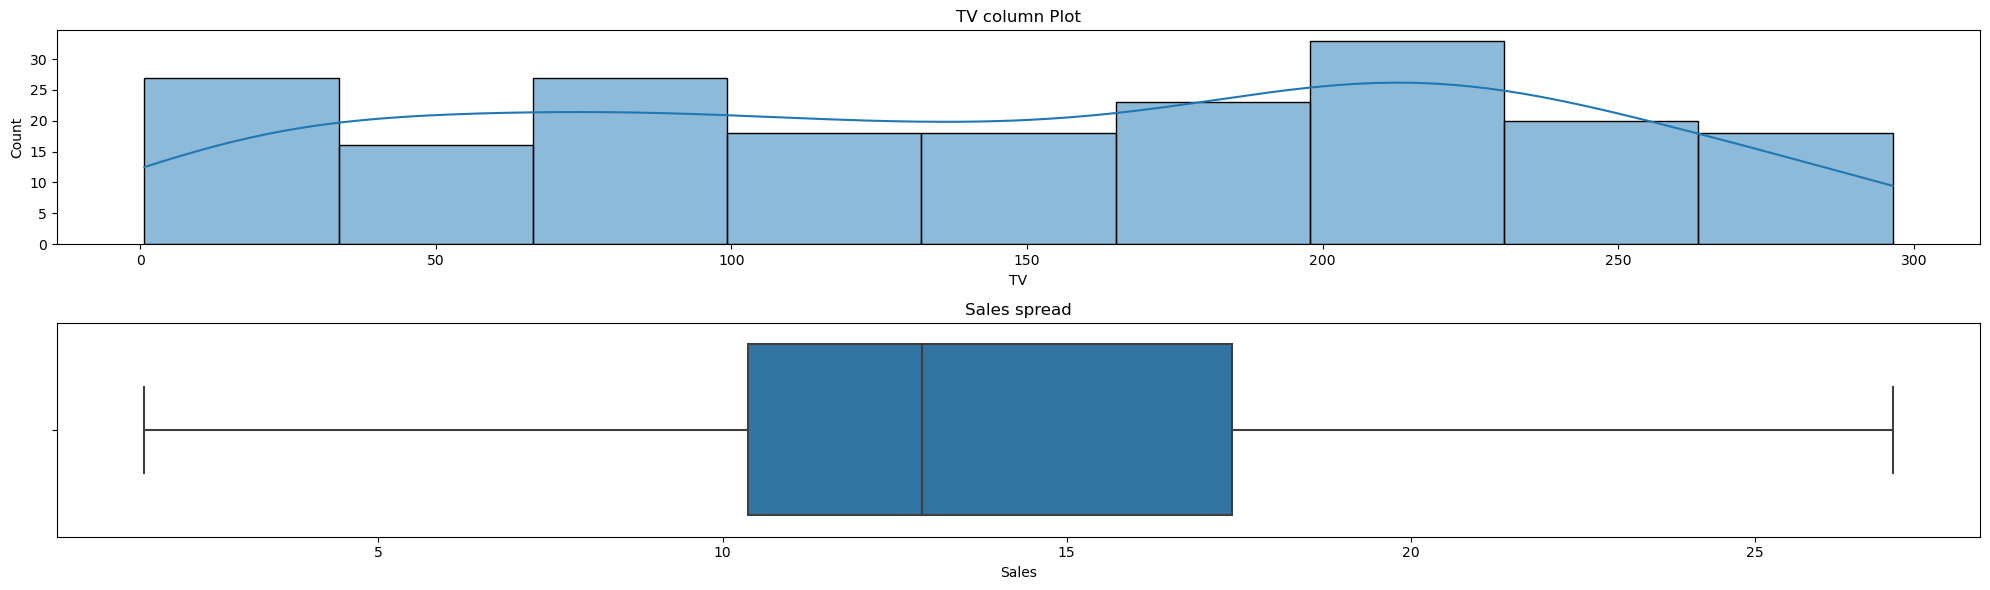

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1) #create 2 rows, 1 column and select the first subplot
plt.title('TV column Plot')
sns.histplot(df.TV, kde=True)

plt.subplot(2,1,2)#create 2 rows, 1 column and select the 2nd subplot
plt.title('Sales spread')
sns.boxplot(x=df.Sales, orient="h")


plt.tight_layout()#adjust spacing between subplots
plt.show()

In [10]:
df.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


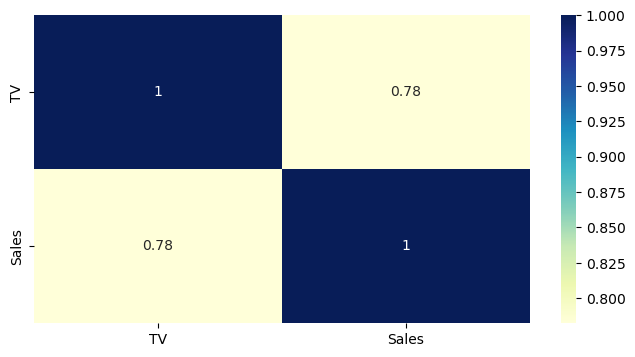

In [11]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

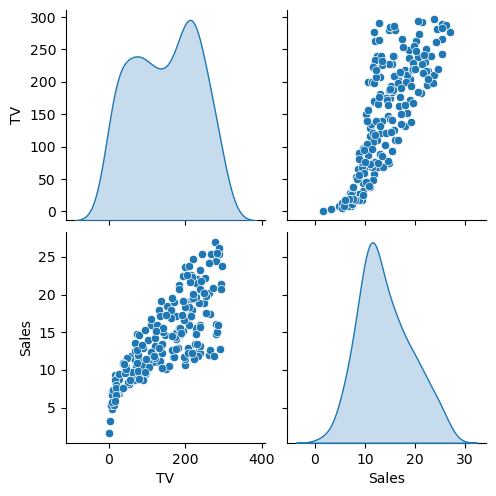

In [12]:
sns.pairplot(data=df,diag_kind='kde')
plt.show()

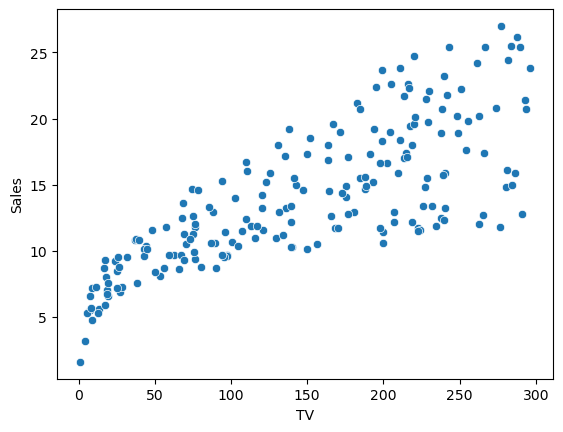

In [13]:
sns.scatterplot(data=df,x='TV',y='Sales')
plt.show()

Accepted skew value= -0.5 to 0.5

In [14]:
df.skew()

TV      -0.069853
Sales    0.407571
dtype: float64

MODEL BUILDING

In [15]:
# Split the dataset into features (X) and target variable (y)
X = df['TV']
y = df['Sales']

In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [58]:
# Standardize the features using StandardScaler
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Reshape the single-feature X_train and X_test to 2D arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped =  np.array(X_test).reshape(-1, 1)

X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)


In [59]:
# Build the Simple Linear Regression model
slr_model = LinearRegression()

# Fit the model to the training data
slr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
# Make predictions on the test set
y_pred = slr_model.predict(X_test_scaled)

dict=pd.DataFrame({'predicted_values: ' : y_pred,'actual_values : ':y_test})
print('comparision: \n',dict)

comparision: 
      predicted_values:   actual_values : 
95            14.817854              16.9
15            16.307544              22.4
30            20.832305              21.4
158            7.782431               7.3
128           17.463099              24.7
115           10.724686              12.6
69            17.300671              22.3
170            9.559850               8.4
174           17.560555              11.5
45            15.365466              14.9
66             8.701306               9.5
182            9.847578               8.7
165           18.122089              11.9
78             7.490062               5.3
186           13.713348              10.3
177           15.138068              11.7
56             7.578237               5.5
152           16.409642              16.6
82            10.733967              11.3
68            18.256672              18.9
124           17.890050              19.7
16            10.385909              12.5
148            9.00

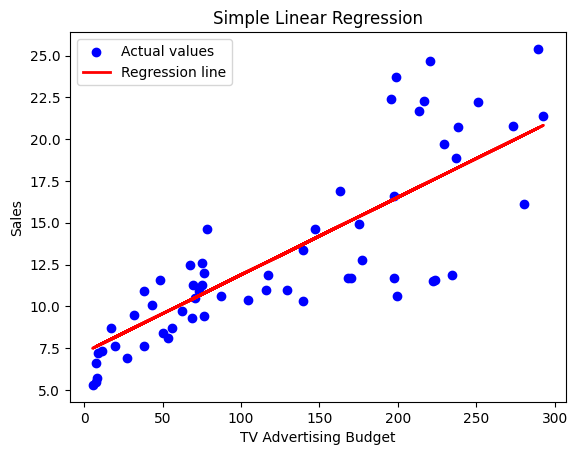

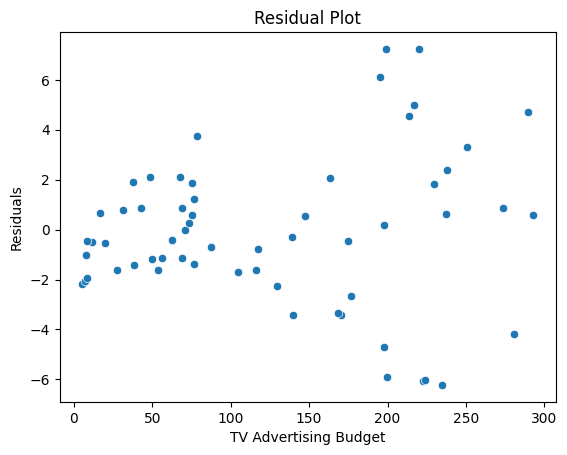

In [61]:
# Visualize the model
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test - y_pred
sns.scatterplot(x=X_test.squeeze(), y=residuals)
plt.title('Residual Plot')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Residuals')
plt.show()


MODEL EVALUATION

In [62]:
# Evaluate the model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean absolute Error: 2.2758809050205118
Mean Squared Error: 8.970991242413614
Root Mean Squared Error: 2.9951613049072354
R-squared: 0.6714477229302764


In [63]:
# Cross-validation
cv_scores = cross_val_score(slr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {np.mean(cv_rmse_scores)}')

Cross-validated RMSE: 3.333965029753029
